In [1]:
# SIMULATION
import numpy as np
import matplotlib.pyplot as plt
from copy import copy
import list_initial_conditions as ic
import list_ibvp_solution as ibvp
import list_swwe_function as swe
from time import time
from flowtype import flowtype_function

start=time()
# set up nature of the simulation, with or without manufactured solution:
# 1. manufactured_solution = ibvp.linearSWWE_mms
# 2. manufactured_solution = False
mms = False

SAT_function = swe.linearised_SWWE_SAT_terms
RHS = swe.linearswwe_RHS

# set 'generated_wave = False' if manufactured_solution is not False
# generated_wave = False
# generated_wave = ibvp.zero_wave
generated_wave = ibvp.gaussian_wave_1
# generated_wave = ibvp.step_function_wave

# set up parameters
cfl = 0.25
H = 1.0
g = 9.81
c = np.sqrt(g*H)

# coefficient may vary 
U_coeff = 0.5
alpha_coeff = 0

U = U_coeff*c
alpha = alpha_coeff*(np.abs(U)+c)

flowtype = flowtype_function(U,c)

# set up the domain 
x0, xN = 0,(np.abs(U)+np.sqrt(g*H))*5
# x0, xN = 0, 4
N = 2**11
dx = (xN-x0)/(N-1)  
x = np.linspace(x0,xN,N)

# set up time parameters
dt = cfl*dx/(np.abs(U) + np.sqrt(g*H))      # (cfl * dx)/max speed
sim_time = np.pi*0.25
# sim_time = 2000*dt

# set up supportive matrix 
Q, A, P_inv = swe.linearised_SWWE_matrix_supportive(N, dx)

# list constants
constants = x,H,U,g,c,alpha,flowtype,Q,A,P_inv, \
        RHS, SAT_function, \
        False, generated_wave 

# x,H,U,g,c,alpha,flowtype,Q,A,P_inv,RHS_function, SAT,manufactured_solution, analytical_solution = constants

# solving the IBVP 
# set up initial conditions
# initial_type (int): The type of initial condition for perturbation height if no MMS. 
#                                0 = drybed, 1 = Gaussian

q = ic.initial_condition(x, H, 0)

q_numerical = copy(q)
q_analytical = copy(q)

q_numerical = swe.numerical_solution(q_numerical,sim_time,dt,constants)
# q_analytical = swe.analytical_solution(x,sim_time,dt,constants)

end = time()
print(f"grid size: {N}, dx: {dx}")
print(f"simulation time: {np.round(sim_time,4)} s, dt: {np.round(dt,4)} s")
print(f"U*sqrt(gH): {U_coeff}, alpha*(np.abs(U)+c): {alpha_coeff}")
print(f"U: {U}, alpha: {alpha}")
print(f"flowtype: {flowtype}")
print() 
print("Time taken: ", end-start)
 

grid size: 2048, dx: 0.011475666656105882
simulation time: 0.7854 s, dt: 0.0006 s
U*sqrt(gH): 0.5, alpha*(np.abs(U)+c): 0
U: 1.5660459763365826, alpha: 0.0
flowtype: subcritical

Time taken:  4.791022062301636


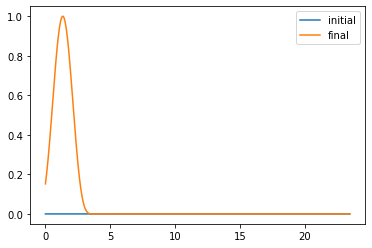

In [2]:
# PLOT
h0, u0 = q_numerical[0]
h, u = q_numerical[-2]
plt.plot(x,h0, label='initial')
plt.plot(x,h, label='final')
plt.legend()
plt.show()